# REST APIs 

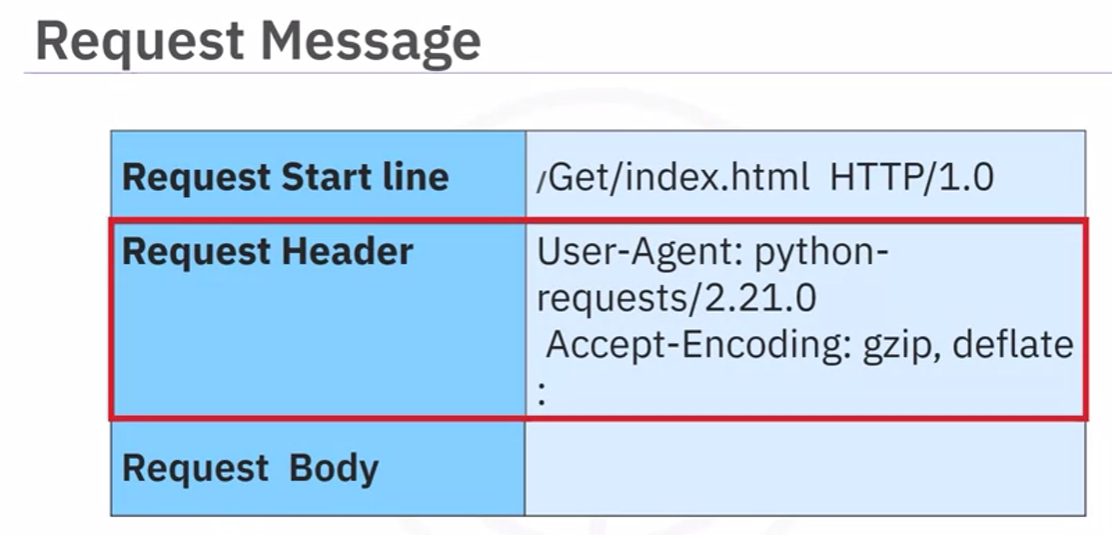

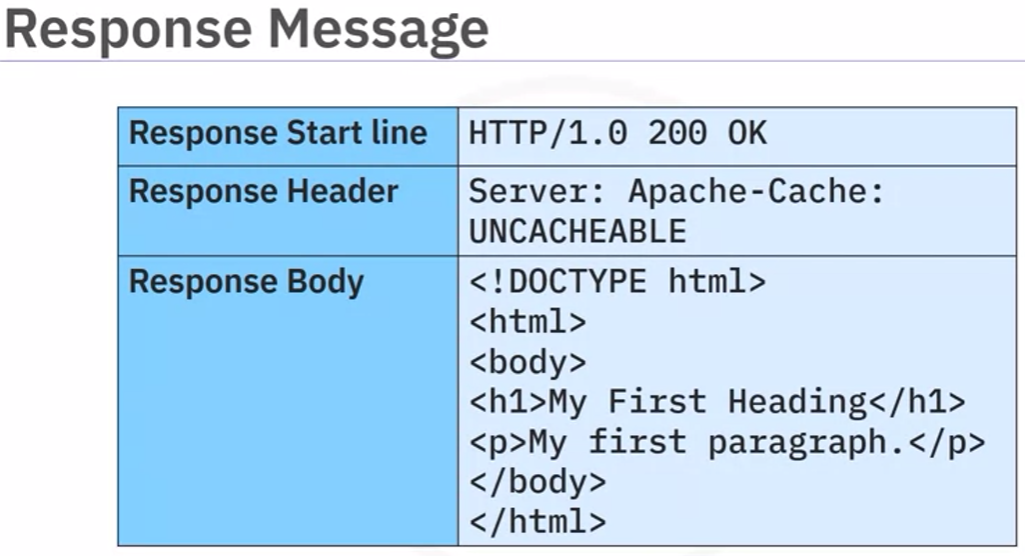

## Requests

In [1]:
import requests

In [2]:
url = 'https://www.ibm.com/'
r = requests.get(url) #get request

### Status code

| Status code | Description |
|-----|-----|
|1xx|Informational|
|100| Evereything so far is OK |
|2xx | Success |
|200 | OK |
|3xx | Redirection |
|300 | Multiple choices |
|4xx | Client error |
|401 | Unauthorized |
|403 | Forbidden |
|404 | Not found |
|500| Server error|
|501| Not implemented |


In [3]:
r.status_code # should be 200 if OK


200

### Reques body and others

In [4]:
r.request.body # should be None as there is no body for get requests

In [5]:
r.headers


{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Sun, 22 Sep 2024 04:27:24 GMT', 'ETag': '"28ca4-622adb067ca63-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Sun, 22 Sep 2024 06:10:36 GMT', 'X-Akamai-Transformed': '9 25045 0 pmb=mTOE,2', 'Content-Encoding': 'gzip', 'Date': 'Sun, 22 Sep 2024 06:00:36 GMT', 'Content-Length': '25247', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}

In [6]:
header = r.headers
print(header['date'])
print(header['Content-Type'])
print(r.encoding)
print(r.text[:40])


Sun, 22 Sep 2024 06:00:36 GMT
text/html;charset=utf-8
utf-8

<!DOCTYPE HTML>
<html lang="en">
<head>


### GET Request

In [7]:
url_get = 'http://httpbin.org/get'
payload = {'name':'Joseph', 'ID':'123'} # It will be used to create a query string

r = requests.get(url_get, params= payload)

r.url # It will display the URL with the query created

'http://httpbin.org/get?name=Joseph&ID=123'

In [8]:
print(r.headers['date'])
print(r.request.body)
print(r.status_code)
print(r.text) # It will display the respons in text
print(r.encoding)
print(r.headers['Content-Type'])
print(r.json())
print(r.json()['args'])

Sun, 22 Sep 2024 06:00:37 GMT
None
200
{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-66efb285-07c59a5820142ea87643ac13"
  }, 
  "origin": "187.173.129.24", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}

utf-8
application/json
{'args': {'ID': '123', 'name': 'Joseph'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.3', 'X-Amzn-Trace-Id': 'Root=1-66efb285-07c59a5820142ea87643ac13'}, 'origin': '187.173.129.24', 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}
{'ID': '123', 'name': 'Joseph'}


### POST Request

In [9]:
url_post = 'http://httpbin.org/post'
payload = {'name':'Joseph', 'ID':'123'}

r_post = requests.post(url_post,data= payload)

r_post.request.body

'name=Joseph&ID=123'

## Web Scraping and BeautifulSoap

The followiing image shows a tree-like structure. This tree represents HMTL tags as nodes.
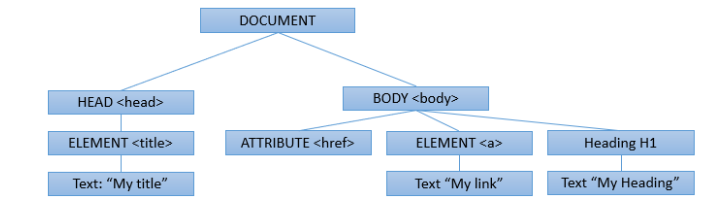

In [10]:
from bs4 import BeautifulSoup  
import requests

In [11]:
url = 'https://en.wikipedia.org/wiki/IBM'
response = requests.get(url)

html_content = response.text # Store the HTML content in the variable html_content

soup = BeautifulSoup(html_content, 'html.parser')

print(html_content[:500])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-


In [12]:
links = soup.find_all('a')

for link in links:
    print(link.text)

Jump to content
Main page
Contents
Current events
Random article
About Wikipedia
Contact us
Donate
Help
Learn to edit
Community portal
Recent changes
Upload file








Search

Create account
Log in
 Create account
 Log in
learn more
Contributions
Talk

(Top)



1
History




2
Corporate affairs




2.1
Business trends




2.2
Board and shareholders




2.3
Headquarters and offices




3
Products




3.1
Hardware




3.1.1
Mainframe computers




3.1.2
Microprocessors




3.2
Software




3.3
Cloud services




3.4
Artificial intelligence




4
Consulting




5
Research




6
Brand and reputation




6.1
Environmental




7
People and culture




7.1
Employees




7.1.1
Notable current and former employees




7.2
Workplace culture




7.3
Labor relations




8
See also




9
Notes




10
References




11
Further reading




12
External links


Afrikaans
Alemannisch
العربية
Asturianu
Azərbaycanca
تۆرکجه
বাংলা
閩南語 / Bân-lâm-gú
Башҡортса
Беларуская
Беларуская (тарашкевіца)
Български
Bo

### Tag objects
BeautifulSoap converts the HTML text into a tree-like compose of objects

In [13]:
from bs4 import BeautifulSoup
import requests

Let's consider the following HTML file:


<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [14]:
html = "<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"


In [15]:
soup = BeautifulSoup(html, 'html.parser') # Use 'html.parser' to parse the html text

In [16]:
# It can be seen in the nested structure:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



The Tag object correspond to an HTML tag in the original document, for example the tag title:

In [17]:
tag_object = soup.title 
print(f'tag object type: {type(tag_object)}')

tag object type: <class 'bs4.element.Tag'>


If there is more than one tag with the same name, the first element with that Tag is called:

In [18]:
tag_object = soup.h3
tag_object # Notice that it is enclosed in the bold attribute

<h3><b id="boldest">Lebron James</b></h3>

The name can be called using the child attribute:

In [19]:
tag_child = tag_object.b 
tag_child

<b id="boldest">Lebron James</b>

And vice-versa to obtain the parent

In [20]:
tag_parent = tag_child.parent
tag_parent

<h3><b id="boldest">Lebron James</b></h3>

We can go over the next siblings with the following lines:

In [21]:
sibling_1 = tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [22]:
sibling_2 = sibling_1.next_sibling
print(sibling_2)

sibling_3 = sibling_2.next_sibling
print(sibling_3)

<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>


#### HTML Attributes
If the tag has attributes, the tag id="boldest" has an attribute id whose value is boldest. It can be called like a dicionary:


In [23]:
print(tag_child.attrs)
print(tag_child['id']) # It can be used also tag_chil.egt('id')

{'id': 'boldest'}
boldest


#### Navigable String
We can obtain the string within the Tag with the string.

In [24]:
tag_string = tag_child.string

print(tag_string)
print(type(tag_string))
print(str(tag_string))

Lebron James
<class 'bs4.element.NavigableString'>
Lebron James


#### Filter
In this section we will pass a string to a different filter method and BeautifulSoup will perfom a match against that exact string.

In [25]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

table_bs = BeautifulSoup(table, 'html.parser')
print(table_bs.prettify())

<table>
 <tr>
  <td id="flight">
   Flight No
  </td>
  <td>
   Launch site
  </td>
  <td>
   Payload mass
  </td>
 </tr>
 <tr>
  <td>
   1
  </td>
  <td>
   <a href="https://en.wikipedia.org/wiki/Florida">
    Florida
    <a>
    </a>
   </a>
  </td>
  <td>
   300 kg
  </td>
 </tr>
 <tr>
  <td>
   2
  </td>
  <td>
   <a href="https://en.wikipedia.org/wiki/Texas">
    Texas
   </a>
  </td>
  <td>
   94 kg
  </td>
 </tr>
 <tr>
  <td>
   3
  </td>
  <td>
   <a href="https://en.wikipedia.org/wiki/Florida">
    Florida
    <a>
    </a>
   </a>
  </td>
  <td>
   80 kg
  </td>
 </tr>
</table>



In [26]:
# find all rows in the table with the tag 'tr'
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [27]:
first_row = table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [28]:
# Obtain the chil
first_row.td

<td id="flight">Flight No</td>

In [29]:
# We can iterate through the list of rows
for i, row in enumerate(table_rows):
    print('row',i, 'is', row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [30]:
# An improve over the previous one
for i, row in enumerate(table_rows):
    print('row', i)
    for j, cell in enumerate(row.find_all('td')):
        print(f'row: {i} column: {j} | {cell.string}')


row 0
row: 0 column: 0 | Flight No
row: 0 column: 1 | Launch site
row: 0 column: 2 | Payload mass
row 1
row: 1 column: 0 | 1
row: 1 column: 1 | None
row: 1 column: 2 | 300 kg
row 2
row: 2 column: 0 | 2
row: 2 column: 1 | Texas
row: 2 column: 2 | 94 kg
row 3
row: 3 column: 0 | 3
row: 3 column: 1 | None
row: 3 column: 2 | 80 kg


In [31]:
list_inputs = table_bs.find_all(name=['tr','td'])
for i, cell in enumerate(list_inputs):
    print(i, cell.string)

0 None
1 Flight No
2 Launch site
3 Payload mass
4 None
5 1
6 None
7 300 kg
8 None
9 2
10 Texas
11 94 kg
12 None
13 3
14 None
15 80 kg


#### Attributes
If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example with the id argument, Beautiful Soup will filter against each tag’s id attribute. For example, the first td elements have a value of id of flight, therefore we can filter based on that id value.


In [34]:
table_bs.find_all(id = 'flight')

[<td id="flight">Flight No</td>]

In [42]:
table_bs.find_all(href = True)


[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [44]:
soup.find_all(id= 'boldest')

[<b id="boldest">Lebron James</b>]

We can search base on string...

In [45]:
table_bs.find_all(string='Florida')

['Florida', 'Florida']

#### Exercise
Consider two tables in the same html

In [48]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

two_tables = BeautifulSoup(two_tables, 'html.parser')
print(two_tables.prettify())

<h3>
 Rocket Launch
</h3>
<p>
 <table class="rocket">
  <tr>
   <td>
    Flight No
   </td>
   <td>
    Launch site
   </td>
   <td>
    Payload mass
   </td>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td>
    Florida
   </td>
   <td>
    300 kg
   </td>
  </tr>
  <tr>
   <td>
    2
   </td>
   <td>
    Texas
   </td>
   <td>
    94 kg
   </td>
  </tr>
  <tr>
   <td>
    3
   </td>
   <td>
    Florida
   </td>
   <td>
    80 kg
   </td>
  </tr>
 </table>
</p>
<p>
 <h3>
  Pizza Party
 </h3>
 <table class="pizza">
  <tr>
   <td>
    Pizza Place
   </td>
   <td>
    Orders
   </td>
   <td>
    Slices
   </td>
  </tr>
  <tr>
   <td>
    Domino's Pizza
   </td>
   <td>
    10
   </td>
   <td>
    100
   </td>
  </tr>
  <tr>
   <td>
    Little Caesars
   </td>
   <td>
    12
   </td>
   <td>
    144
   </td>
  </tr>
  <tr>
   <td>
    Papa John's
   </td>
   <td>
    15
   </td>
   <td>
    165
   </td>
  </tr>
 </table>
</p>



In [49]:
two_tables.find('table') # Search for the first table 

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [51]:
# For searching the second table we can search for the class of the second table
two_tables.find('table', class_ = 'pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

##### 2nd Exercise
- Scrape the link from the url
- Scrape all images
- Scrape data from HTML tables from other url

In [69]:
url = 'http://www.ibm.com'

data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

# Scrape the links
for link in soup.find_all('a', href = True):
    print(f"origen de a: {link} \nLink:{link.get('href')}")         

origen de a: <a href="https://www.ibm.com/hybrid-cloud?lnk=hpUSbt1">hybrid cloud infrastructure</a> 
Link:https://www.ibm.com/hybrid-cloud?lnk=hpUSbt1
origen de a: <a href="https://www.ibm.com/consulting" rel="noopener noreferrer" target="_self">IBM Consulting</a> 
Link:https://www.ibm.com/consulting


In [70]:
for link in soup.find_all('img'):
    print(link)
    print(link.get('src'))

In [74]:
table = soup.find('table')

#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

AttributeError: 'NoneType' object has no attribute 'find_all'

## Using pandas

Pandas can be used to extract data into tables directly from the web.
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/images/pandas_wbs_3.png">

In [32]:
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [33]:
url = 'http://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'

tables = pd.read_html(url)
df = tables[3]
df.head()

Country/Territory UN region IMF[1][13]            World Bank[14]             \
  Country/Territory UN region   Estimate       Year       Estimate       Year   
0             World         —  105568776       2023      100562011       2022   
1     United States  Americas   26854599       2023       25462700       2022   
2             China      Asia   19373586  [n 1]2023       17963171  [n 3]2022   
3             Japan      Asia    4409738       2023        4231141       2022   
4           Germany    Europe    4308854       2023        4072192       2022   

  United Nations[15]             
            Estimate       Year  
0           96698005       2021  
1           23315081       2021  
2           17734131  [n 1]2021  
3            4940878       2021  
4            4259935       2021

## Exercises



### 1 Exercise
From the url, download the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

In [11]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

response = requests.get(url)

if response.status_code == 200:
    with open('addresses.csv', 'wb') as f: # For files that come from web or API´s it is convenient use wb for files that are in binaries
        f.write(response.content)
else: 
    print('There was a problema')



In [15]:
df = pd.read_csv('addresses.csv')
df


,John,Doe,120 jefferson st.,Riverside,NJ,08075
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
3,NaN,Blankman,NaN,SomeTown,SD,298
4,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


Is needed to fix the columns names

In [18]:
df = pd.read_csv('addresses.csv', header = None)
df.columns = ['name','last name','street','city', 'abbr', 'area code']
df

,name,last name,street,city,abbr,area code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


In [20]:
df.loc[0]

name                      John
last name                  Doe
street       120 jefferson st.
city                 Riverside
abbr                        NJ
area code                 8075
Name: 0, dtype: object

In [21]:
df.loc[[0,2,4],'name']

0             John
2    John "Da Man"
4              NaN
Name: name, dtype: object

In [23]:
df.iloc[0:4:2,0]

0             John
2    John "Da Man"
Name: name, dtype: object

### 2nd Exercise
Transform function in pandas

In [24]:
import pandas as pd
import numpy as np

In [30]:
df = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]), columns=  ['a','b','c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [36]:
df = df.transform(lambda x: x + 10)
df = df.transform(lambda x: np.sqrt(x))
df 

,a,b,c
0,3.464102,3.472488,3.479854
1,3.486460,3.492473,3.498009
2,3.503151,3.507960,3.512484


## JSON
This is usually called **serialization**. It is the process of converting an object into a special format which is suitable for transmitting over the network or storing in file or database.

To handle the data flow in a file, the JSON library in Python uses the dump() or dumps() function to convert the Python objects into their respective JSON object. This makes it easy to write data to files.

In [37]:
import json

In [40]:
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}



serialization using dump() function
json.dump() method can be used for writing to JSON file.

Syntax: json.dump(dict, file_pointer)

Parameters:

1. dictionary – name of the dictionary which should be converted to JSON object.
2. file pointer – pointer of the file opened in write or append mode.

In [42]:
with open('sample_dump.json', 'w') as f:
    json.dump(person, f)

serialization using dumps() function
json.dumps() that helps in converting a dictionary to a JSON object.

It takes two parameters:

1. dictionary – name of the dictionary which should be converted to JSON object.
2. indent – defines the number of units for indentation

In [43]:
json_object = json.dumps(person, indent=4)

with open('sample_dumps.json', 'w') as f:
    f.write(json_object)

Using json.load()
The JSON package has json.load() function that loads the json content from a json file into a dictionary.

It takes one parameter:

File pointer : A file pointer that points to a JSON file.

In [44]:
with open('sample_dump.json', 'r') as f:
    json_loaded = json.load(f)

print(json_loaded)

{'first_name': 'Mark', 'last_name': 'abc', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}


## Data Analysis - Diabetes dataset

### **Diabetes dataset**

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [45]:
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

response = requests.get(url)

if response.status_code == 200:
    with open('diabetes.csv', 'wb') as f:
        f.write(response.content)
else:
    print('Error: status_code != 200')

In [48]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can see some info about the dataset:

In [51]:
print(f'Shape: {df.shape} \nInfo: {df.info()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Shape: (768, 9) 
Info: None


We can also get a quick view about statistics:

In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Identify missing data

In [56]:
missing_data = df.isnull()
missing_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,768,768,768,768,768,768,768,768,768


As the info method showed previously, there are not null values, in other words there are not missing data

In [62]:
for column in missing_data.columns:
    print(column)
    print(f'Missing data: {missing_data[column].value_counts()}')

Pregnancies
Missing data: Pregnancies
False    768
Name: count, dtype: int64
Glucose
Missing data: Glucose
False    768
Name: count, dtype: int64
BloodPressure
Missing data: BloodPressure
False    768
Name: count, dtype: int64
SkinThickness
Missing data: SkinThickness
False    768
Name: count, dtype: int64
Insulin
Missing data: Insulin
False    768
Name: count, dtype: int64
BMI
Missing data: BMI
False    768
Name: count, dtype: int64
DiabetesPedigreeFunction
Missing data: DiabetesPedigreeFunction
False    768
Name: count, dtype: int64
Age
Missing data: Age
False    768
Name: count, dtype: int64
Outcome
Missing data: Outcome
False    768
Name: count, dtype: int64


We can also change the type of data with astype()

In [73]:
df['Outcome'] = df.Outcome.astype('int32')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 51.1 KB


#### Visualization

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

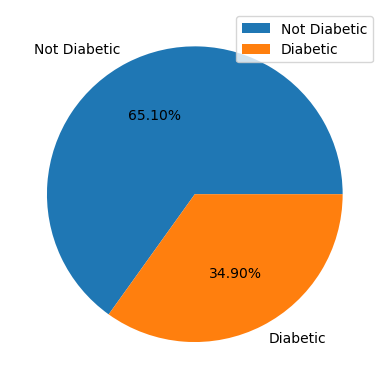

In [81]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()